<a href="https://colab.research.google.com/github/RafihaikalP/Rafi-Haikal-Pratama_2411532002_ML_2526/blob/main/Praktikum1/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets = df['MedHouseValue']             # Dependent Variable
inputs = df.drop(['MedHouseValue'], axis=1) # Independent Variable
# Menampilkan 5 data terakhir
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [5]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)

# Mencetak ukuran (shape) dari masing-masing dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_test)

[[0.18965945 0.74       0.0550281  ... 0.02139588 0.16219119 0.60750507]
 [0.10196411 0.7        0.06294725 ... 0.03781046 0.45435016 0.46348884]
 [0.24229321 0.88       0.05465432 ... 0.06085896 0.55639098 0.19574037]
 ...
 [0.14390146 0.9        0.05794224 ... 0.04109665 0.59828142 0.21298174]
 [0.14550834 0.22       0.06382777 ... 0.04029216 0.59291085 0.21399594]
 [0.08333678 0.54       0.02884893 ... 0.04399789 0.16648765 0.61359026]]


In [25]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')


intercept: 3.7215161325064994
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


MSE: 0.5559839975928286
R2: 0.5770965588241961


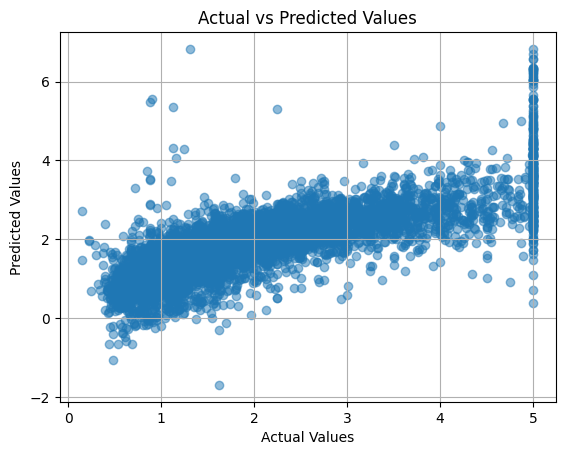

In [28]:
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = lr_model.score(X_test, y_test)

print(f'MSE: {mse}')
print(f'R2: {r2}')

# Visualisasi Hasil
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [29]:
filename = 'finalized_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))